In [1]:
#pip install --upgrade ipykernel

In [2]:
import gzip
import json
import pandas as pd

document_names=['offline_sales.json.gz', 'online_orders.json.gz', 'online_pageviews.json.gz']

for name in document_names:
    with gzip.open(name, 'rb') as f:
        if name == 'offline_sales.json.gz':
            unzipped_offline_sales = f.read() #as json
        if name == 'online_orders.json.gz':
            unzipped_online_orders = f.read() #as json
        if name == 'online_pageviews.json.gz':
            unzipped_online_pageviews = f.read() #as json


In [3]:
offline_sales_df = pd.read_json(unzipped_offline_sales, lines=True)
online_orders_df = pd.read_json(unzipped_online_orders, lines=True)
online_pageviews_df = pd.read_json(unzipped_online_pageviews, lines=True)

offline_sales: data related to sales in store

In [4]:
offline_sales_df.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN


In [5]:
print('Offline sales: \nThere are {} rows with NaN Customer ID for a total of {} rows, meaning {:.2f}% of the rows.'.format(offline_sales_df.customer_id.isnull().sum(), len(offline_sales_df), 100*offline_sales_df.customer_id.isnull().sum()/len(offline_sales_df)))

Offline sales: 
There are 3528 rows with NaN Customer ID for a total of 29372 rows, meaning 12.01% of the rows.


online_orders: data related to online sales

In [6]:
online_orders_df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN


In [7]:
print('Online orders: \nThere are {} rows with NaN Customer ID for a total of {} rows, meaning {:.2f}% of the rows.'.format(online_orders_df.customer_id.isnull().sum(), len(online_orders_df), 100*online_orders_df.customer_id.isnull().sum()/len(online_orders_df)))

Online orders: 
There are 4480 rows with NaN Customer ID for a total of 12237 rows, meaning 36.61% of the rows.


online_pageviews: data related to online website visualisation

In [8]:
online_pageviews_df.head()

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
0,2018-08-01,6.162326e+24,desktop,home,NaN,NaN,NaN
1,2018-08-01,3.538363e+24,desktop,landing_page,NaN,NaN,NaN
2,2018-08-01,3.130377e+24,mobile,subcategory,6.161393e+09,NaN,NaN
3,2018-08-01,3.130377e+24,mobile,subcategory,6.664354e+09,NaN,NaN
4,2018-08-01,3.235374e+24,desktop,landing_page,NaN,NaN,NaN


In [9]:
print("Online page views:")
print('category_id: {} NaN values of a total of {} rows ({:.2f}%).'.format(online_pageviews_df.customer_id.isnull().sum(), len(online_pageviews_df), 100*online_pageviews_df.category_id.isnull().sum()/len(online_pageviews_df)))
print('on_product_id: {} NaN values of a total of {} rows ({:.2f}%).'.format(online_pageviews_df.on_product_id.isnull().sum(), len(online_pageviews_df), 100*online_pageviews_df.on_product_id.isnull().sum()/len(online_pageviews_df)))
print('customer_id: {} NaN values of a total of {} rows ({:.2f}%).'.format(online_pageviews_df.customer_id.isnull().sum(), len(online_pageviews_df), 100*online_pageviews_df.customer_id.isnull().sum()/len(online_pageviews_df)))


Online page views:
category_id: 3371775 NaN values of a total of 3452540 rows (29.39%).
on_product_id: 2047370 NaN values of a total of 3452540 rows (59.30%).
customer_id: 3371775 NaN values of a total of 3452540 rows (97.66%).


In [10]:
offline_sales_groupby_sales_df = offline_sales_df.groupby(by='sale_id', as_index=True)
offline_sales_groupby_sales_df.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN
...,...,...,...,...,...,...,...,...
29367,2018-08-31,RS,6637353,633064386463376,346433376135623,1,129.0,6.439626e+19
29368,2018-08-31,RS,6637353,633064386463376,633239313036316,1,138.0,6.439626e+19
29369,2018-08-31,RS,6637353,393832393138626,333938616133373,1,149.0,6.632647e+19
29370,2018-08-31,RS,6637353,393832393138626,366337303963646,1,109.0,6.632647e+19


In [11]:
online_orders_groupby_order_df = online_orders_df.groupby(by='order_id', as_index=True)
online_orders_groupby_order_df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN
...,...,...,...,...,...,...,...,...
12232,2018-08-31,3.133384e+24,desktop,636136633433353,323765383935613,1,349,3.639383e+19
12233,2018-08-31,6.532624e+24,mobile,313334363633303,333437623263326,1,199,3.461394e+19
12234,2018-08-31,3.535356e+24,desktop,626166643633306,613264333961396,1,349,NaN
12235,2018-08-31,3.639664e+24,desktop,313030636530313,393665363031353,1,149,NaN


# Question 1: What was the income during this period?

In [12]:
min_period=min(online_orders_df.date.min(), offline_sales_df.date.min(), online_pageviews_df.date.min())
max_period=min(online_orders_df.date.max(), offline_sales_df.date.max(), online_pageviews_df.date.max())

print('Period: from {} to {}'.format(min_period, max_period))

Period: from 2018-08-01 00:00:00 to 2018-08-31 00:00:00


Data was mined in Brazil, meaning the price should be in local currency, reais (R$ / BRL)

In [13]:
income_offline = offline_sales_df.price.sum()
income_online = online_orders_df.price.sum()
total_income = income_offline + income_online
print('Income from {}/{}/{} to {}/{}/{}: R${:.2f}'.format(min_period.day, min_period.month, min_period.year, max_period.day, max_period.month, max_period.year, total_income))

Income from 1/8/2018 to 31/8/2018: R$19389777.13


# Answer 1: 19.389.777,13 BRL

# Question 2: What is the most purchased online product?

In [14]:
online_orders_df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN


In [15]:
online_orders_quantity_per_product_id = online_orders_df.groupby(by='on_product_id').quantity.sum()
most_online_purchased_ID = online_orders_quantity_per_product_id[online_orders_quantity_per_product_id == online_orders_quantity_per_product_id.max()].index[0]

In [16]:
print('The most purchased item was product ID {}, selling {} times.'.format(most_online_purchased_ID,online_orders_quantity_per_product_id[most_online_purchased_ID]))

The most purchased item was product ID 626664333563363, selling 74 times.


# Answer 2: Product ID 626664333563363

# Question 3: Do Rio de Janeiro citizens (cariocas) like to buy during weekends?

In [17]:
offline_sales_df.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN


My analysis will only consider the offline sales, since the IP for online sales are not given.

In [18]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
rj_offline_sales_df = offline_sales_df[offline_sales_df.state == 'RJ']

In [20]:
#import warnings
#warnings.filterwarnings("ignore")

rj_offline_sales_df['date_pd'] = pd.to_datetime(rj_offline_sales_df['date']).dt.date #panda date


offline_weekdays = []
offline_weekdays_num = []
for row in rj_offline_sales_df.date_pd:
    offline_weekdays.append(weekdays[row.weekday()])
    offline_weekdays_num.append(row.weekday())

rj_offline_sales_df['weekday'] = offline_weekdays
#rj_offline_sales_df['weekday_num'] = offline_weekdays_num
#warnings.filterwarnings("error")

C:\Users\felip\AppData\Local\Temp\ipykernel_20404\4215381370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rj_offline_sales_df['date_pd'] = pd.to_datetime(rj_offline_sales_df['date']).dt.date #panda date
C:\Users\felip\AppData\Local\Temp\ipykernel_20404\4215381370.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rj_offline_sales_df['weekday'] = offline_weekdays


In [21]:
rj_count = rj_offline_sales_df.copy()
rj_count = rj_count.groupby(by='weekday', as_index=False).date.count()
rj_count

,weekday,date
0,Friday,1809
1,Monday,836
2,Saturday,1445
3,Sunday,278
4,Thursday,1805
5,Tuesday,1176
6,Wednesday,1518


In [22]:
weekdays.index('Monday')
new_index = [weekdays.index(i) for i in rj_count.weekday]
rj_count['new_index']=new_index
rj_count = rj_count.sort_values(by=['new_index'])
rj_count = rj_count.drop(columns= ['new_index'])
rj_count

,weekday,date
1,Monday,836
5,Tuesday,1176
6,Wednesday,1518
4,Thursday,1805
0,Friday,1809
2,Saturday,1445
3,Sunday,278


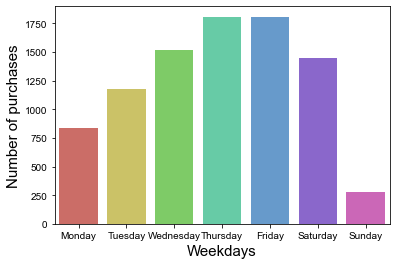

In [23]:
import seaborn as sns
ax = sns.barplot(x = rj_count.weekday, y=rj_count.date, palette = 'hls')
sns.set(rc={'figure.figsize':(10,5)})
ax.set_xlabel('Weekdays', fontsize=15)
ax.set_ylabel('Number of purchases', fontsize=15)
sns.set()

# Answer 3: Yes, RJ citizens like to buy on weekends, but not as much as between Wednesday and Friday. Possible most of the shops are closed during Sunday.

# Question 4: Is it usual to begin a purchase online, but actually buy on a shop?

In [24]:
online_orders_not_nan_df = online_orders_df[pd.isna(online_orders_df.customer_id) == False]
offline_sales_not_nan_df = offline_sales_df[pd.isna(offline_sales_df.customer_id) == False]
online_pageviews_not_nan_df = online_pageviews_df[pd.isna(online_pageviews_df.customer_id) == False]

In [25]:
print('Online order rows (non NaN): {}\nOffline sales rows (non NaN): {}\nOnline views rows (non NaN): {}'.format(len(online_orders_not_nan_df), len(offline_sales_not_nan_df), len(online_pageviews_not_nan_df)))

Online order rows (non NaN): 7757
Offline sales rows (non NaN): 25844
Online views rows (non NaN): 80765


In [26]:
#merged_onviews_off_sales = pd.merge(online_pageviews_not_nan_df, offline_sales_not_nan_df, on='customer_id')
#print('There are {} customers ID in common using the offline sales and online orders'.format(len(merged_onviews_off_sales.customer_id.unique())))

There are 592 customers ID in common using the offline sales and online orders


In [27]:
#merged_onviews_off_sales.head()

,date_x,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id,date_y,state,store_id,sale_id,off_product_id,quantity,price
0,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19,2018-08-10,SP,3665663,363437346335666,303334626337663,1,228.0
1,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19,2018-08-10,SP,3665663,363437346335666,343037306565333,1,898.0
2,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19,2018-08-10,SP,3665663,363437346335666,366362663230653,1,498.0
3,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19,2018-08-30,SP,3665663,303635663761643,303334626337663,1,228.0
4,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19,2018-08-30,SP,3665663,303635663761643,306637653739386,1,228.0


In [28]:
merged_onviews_off_sales.pageType.unique()

array(['cart', 'home', 'product', 'category', 'subcategory',
       'confirmation', 'emptysearch', 'other', 'userprofile', 'search',
       'landing_page', 'not_found', 'checkout'], dtype=object)

In [32]:
online_orders_not_nan_df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
7,2018-08-02,3.933384e+24,mobile,636536353265386,356466373137383,1,1798,6.130616e+19
8,2018-08-02,6.363363e+24,mobile,363037313438636,383530353262626,1,428,6.263327e+19


In [41]:
online_pageviews_not_nan_df.head(10).sort_values(by='customer_id')

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
531,2018-08-02,6.661384e+24,desktop,userprofile,NaN,NaN,3.061374e+19
282,2018-08-01,6.237337e+24,mobile,landing_page,NaN,NaN,3.165624e+19
234,2018-08-01,6.339633e+24,desktop,product,6.330623e+09,3.330304e+14,3.235393e+19
105,2018-08-01,3.832637e+24,mobile,product,6.365313e+09,3.232393e+14,3.334316e+19
353,2018-08-01,3.637653e+24,mobile,landing_page,NaN,NaN,3.635314e+19
268,2018-08-01,3.763394e+24,desktop,cart,NaN,NaN,3.765363e+19
603,2018-08-02,6.335387e+24,mobile,landing_page,NaN,NaN,3.965303e+19
548,2018-08-02,3.265344e+24,desktop,other,NaN,NaN,6.433353e+19
441,2018-08-02,6.331667e+24,desktop,home,NaN,NaN,6.630394e+19
569,2018-08-02,3.662633e+24,mobile,product,6.139644e+09,6.261364e+14,6.632364e+19


In [42]:
offline_sales_not_nan_df.head(10).sort_values(by='customer_id')

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
7,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,3.037393e+19
8,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,3.039383e+19
9,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,3.136626e+19
10,2018-08-01,RN,3162633,376465626630613,306439363765386,1,58.0,3.265396e+19
11,2018-08-01,RN,3162633,666564646366383,336139376666306,1,58.0,3.465376e+19
12,2018-08-01,RN,3162633,373266343537653,323361616533353,1,149.0,3.831314e+19
13,2018-08-01,RN,3162633,303061386135616,393935633061663,1,329.0,3.833654e+19
14,2018-08-01,RN,3162633,336538336439626,306439363765386,1,58.0,3.838636e+19
15,2018-08-01,RN,3162633,336538336439626,336139376666306,1,58.0,3.838636e+19
16,2018-08-01,RN,3162633,336538336439626,666466313433383,1,58.0,3.838636e+19


# Question 5: the marketing team wants to offer 20% discount for purchases made in physical store for who placed products in cart before turning down the purchase. Predict the results of this campaign.